# Sentiment Analysis of amazon reviews

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
# drop unnecessary columns from the table
def drop_col(dataframe):
    dataframe=dataframe.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'],axis=1)
    return dataframe

In [6]:
#label unlabelled data 
def label(x):
    new=[]
    for i in x:
        if (i>=4):
            i=1
        else:
                i=0
        new.append(i)
    
    return new

In [7]:
#clean reviews
nonalphanumeric=re.compile(r'[\W]')
non_ascii=re.compile(r'[^a-z0-1\s]')
def clean_reviews(y):
    remove_punc=[]
    for i in y:
        lower=i.lower()
        non_alpha=nonalphanumeric.sub(r' ',lower)
        non_asci=non_ascii.sub(r'',non_alpha)
        remove_punc.append(non_asci)
    return remove_punc

        

In [8]:
# transform using countvectorizer and predict new msgs 
def pred(msg):
    msg = cv.transform([msg])
    prediction = Lr.predict(msg)
    return prediction[0]

In [9]:
# transform usin count vectorizer and model fitting using grid search + logistic regression
def pred_gridcv(msg):
    msg = cv.transform([msg])
    prediction = logreg_cv.predict(msg)
    return prediction[0]

In [10]:
# transform using tfidf and predict new msgs 
def pred_tf(msg):
    msg = tf.transform([msg])
    prediction = Lr_tf.predict(msg)
    return prediction[0]

In [11]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Negative', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Positive'])

In [12]:
df=pd.read_csv('/Users/raghavverma/Downloads/Reviews.csv')

In [13]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [14]:
df=drop_col(df)

In [15]:
# making copy of dataframe
df_new=df.copy()


In [16]:
# calling function to label data, 1 if rating >=4 , 0 if rating < 4
df_new['Score']=label(df_new['Score'].values)

In [17]:
labelled_df=df_new.copy()

In [18]:
# calling function to remove punctuations 
df_new['Text']=clean_reviews(labelled_df.Text.values)

In [19]:
train_labels_y=df_new['Score'].values[20000:25000]

In [20]:
train_review_x=df_new['Text'].values[20000:25000]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(train_review_x,train_labels_y,test_size=0.15,random_state=30)

In [23]:
cv=CountVectorizer(binary=True)
cv.fit(x_train)

CountVectorizer(binary=True)

In [24]:
x_train_cv=cv.transform(x_train)
x_test_cv=cv.transform(x_test)

In [25]:
x_train_cv

<4250x12504 sparse matrix of type '<class 'numpy.int64'>'
	with 244086 stored elements in Compressed Sparse Row format>

In [26]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [27]:
from sklearn.model_selection import GridSearchCV


In [28]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv=GridSearchCV(lr,parameters,cv=10) 
logreg_cv.fit(x_train_cv,y_train)

/Users/raghavverma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/raghavverma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [29]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8289411764705882


In [30]:
yhat=logreg_cv.predict(x_test_cv)

In [31]:
print("Test set Accuracy: ", accuracy_score(y_test, yhat))
logreg_cv.score(x_test_cv,y_test)


Test set Accuracy:  0.8653333333333333


0.8653333333333333

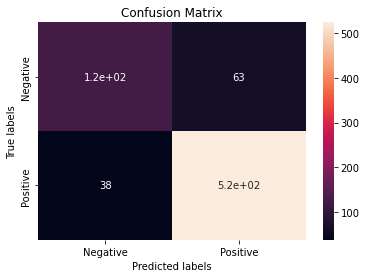

In [32]:
plot_confusion_matrix(y_test,yhat)

In [33]:
    Lr=LogisticRegression()
    Lr.fit(x_train_cv,y_train)
    print("Accuracy for training set: %s" %(accuracy_score(y_train,Lr.predict(x_train_cv))))

    print("Accuracy for test set : %s" %(accuracy_score(y_test,Lr.predict(x_test_cv))))


Accuracy for training set: 0.9924705882352941
Accuracy for test set : 0.8653333333333333


/Users/raghavverma/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


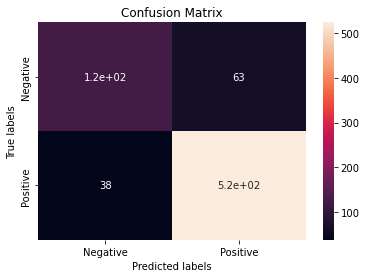

In [34]:
plot_confusion_matrix(y_test,Lr.predict(x_test_cv))

In [35]:
# for CV
Lr.predict_proba(x_test_cv)

array([[0.4911602 , 0.5088398 ],
       [0.96049704, 0.03950296],
       [0.0732698 , 0.9267302 ],
       ...,
       [0.36945614, 0.63054386],
       [0.00785437, 0.99214563],
       [0.9455189 , 0.0544811 ]])

using TF-IDF


In [36]:
tf=TfidfVectorizer(binary=True)
X_train_vect=tf.fit_transform(x_train)

In [37]:
X_test_vect=tf.transform(x_test)

In [38]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr_tf=LogisticRegression()
logreg_tf=GridSearchCV(lr_tf,parameters,cv=10) 
logreg_tf.fit(X_train_vect,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [39]:
print("tuned hpyerparameters :(best parameters) ",logreg_tf.best_params_)
print("accuracy :",logreg_tf.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.808470588235294


In [40]:
ytf_hat=logreg_tf.predict(X_test_vect)

In [41]:
print("Test set Accuracy: ", accuracy_score(y_test, ytf_hat))
logreg_tf.score(X_test_vect,y_test)


Test set Accuracy:  0.824


0.824

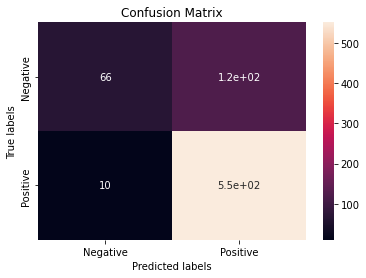

In [42]:
plot_confusion_matrix(y_test,ytf_hat)

In [43]:
Lr_tf=LogisticRegression()
Lr_tf.fit(X_train_vect,y_train)

LogisticRegression()

In [44]:
accuracy_score(y_train,Lr_tf.predict(X_train_vect))

0.8856470588235295

In [45]:
x_test_tfpred=Lr_tf.predict(X_test_vect)

In [46]:
accuracy_score(x_test_tfpred,y_test)

0.824

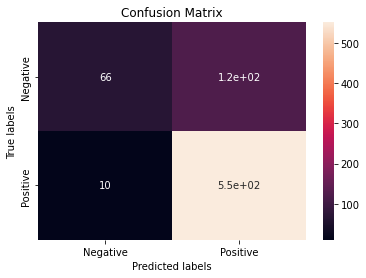

In [47]:
plot_confusion_matrix(y_test,x_test_tfpred)

In [48]:
#TF-IDF
Lr_tf.predict_proba(X_test_vect)

array([[0.44313596, 0.55686404],
       [0.54464159, 0.45535841],
       [0.44156647, 0.55843353],
       ...,
       [0.54396017, 0.45603983],
       [0.09624797, 0.90375203],
       [0.50845602, 0.49154398]])

In [49]:
#testing random msgs from data set
randtf_index = np.random.randint(0, len(df_new))
test_tfsample = df_new.iloc[randtf_index][1]
print(test_tfsample)
print("Text is tfidf - " + str(pred_tf(test_tfsample)))

print("Text is Countvectorizer - " + str(pred(test_tfsample)))
print("Text is grid Countvectorizer - " + str(pred_gridcv(test_tfsample)))


these little goodies are so full of flavor and so good   i bought these for my granddaughter in minnesota and sent them to her   she was thrilled  shared them with her sisters and now they are wanting to get some  br   great gift idea  
Text is tfidf - 1
Text is Countvectorizer - 1
Text is grid Countvectorizer - 1
